In [1]:
import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

/Users/nkose/dev/repo/ml-mastery/_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model = ResNet50(weights='imagenet')
target_size = (224, 224)

102858752/102853048 [==============================] - 22s 0us/step


In [4]:
def predict(model, img, target_size, top_n=3):
  """Run model prediction on image
  Args:
    model: keras model
    img: PIL format image
    target_size: (w,h) tuple
    top_n: # of top predictions to return
  Returns:
    list of predicted labels and their probabilities
  """
  if img.size != target_size:
    img = img.resize(target_size)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  return decode_predictions(preds, top=top_n)[0]

In [5]:
def plot_preds(image, preds):
  """Displays image and the top-n predicted probabilities in a bar graph
  Args:
    image: PIL image
    preds: list of predicted labels and their probabilities
  """
  plt.imshow(image)
  plt.axis('off')

  plt.figure()
  order = list(reversed(range(len(preds))))
  bar_preds = [pr[2] for pr in preds]
  labels = (pr[1] for pr in preds)
  plt.barh(order, bar_preds, alpha=0.5)
  plt.yticks(order, labels)
  plt.xlabel('Probability')
  plt.xlim(0,1.01)
  plt.tight_layout()
  plt.show()

40960/35363 [==================================] - 0s 5us/step


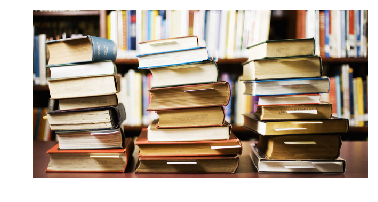

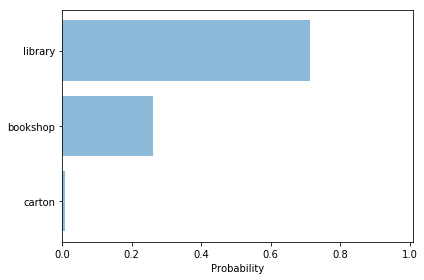

In [6]:
#predict using image

image_path = "./images/books.jpg"

img = Image.open(image_path)

preds = predict(model, img, target_size)
plot_preds(img, preds)

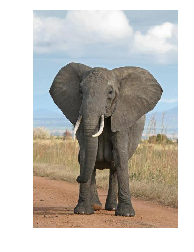

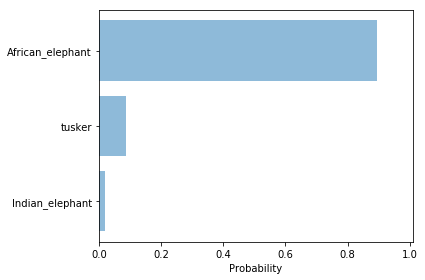

In [7]:
#predict using image url

image_url = "http://i.imgur.com/wpxMwsR.jpg"

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
preds = predict(model, img, target_size)
plot_preds(img, preds)